#AG2 - Actividad Guiada 2
Nombre: Oscar Patricio Cuenca Moreno <br>
Link:   https://colab.research.google.com/drive/1wk5lv1I9a21xLDfYnjWuMfEXXN3QGoo8?authuser=1#scrollTo=ta1tvzVvsKPCx <br>
Github: https://github.com/CuencaOscar/master_viu_ia/blob/master/Algoritmos_Optimizacion/Oscar_Cuenca_AG2.ipynb
<br>




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

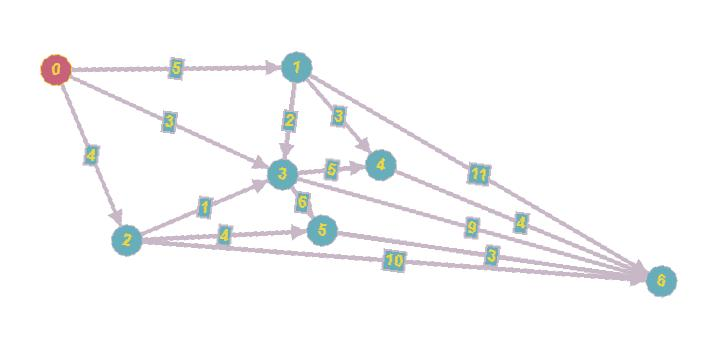

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [4]:
# Definimos la tabla de tarifas, reemplazando 999 por inf
from math import inf
TARIFAS = [
    [0, 5, 4, 3, inf, inf, inf],
    [inf, 0, inf, 2, 3, inf, 11],
    [inf, inf, 0, 1, inf, 4, 10],
    [inf, inf, inf, 0, 5, 6, 9],
    [inf, inf, inf, inf, 0, inf, 4],
    [inf, inf, inf, inf, inf, 0, 3],
    [inf, inf, inf, inf, inf, inf, 0]
]

# Imprimimos la tabla
print("Tarifas actualizadas:")
for fila in TARIFAS:
    print(fila)

Tarifas actualizadas:
[0, 5, 4, 3, inf, inf, inf]
[inf, 0, inf, 2, 3, inf, 11]
[inf, inf, 0, 1, inf, 4, 10]
[inf, inf, inf, 0, 5, 6, 9]
[inf, inf, inf, inf, 0, inf, 4]
[inf, inf, inf, inf, inf, 0, 3]
[inf, inf, inf, inf, inf, inf, 0]


Se realizaron dos cambios en el código. Primero, se reemplazó el valor 999 por inf (infinito) del módulo math para representar rutas imposibles, lo cual mejora la claridad y semántica del código al utilizar un valor más apropiado para representar distancias inaccesibles. Segundo, se agregó una línea de impresión para verificar visualmente que las tarifas se hayan actualizado correctamente, lo que facilita la validación inicial antes de ejecutar cualquier algoritmo de optimización.

In [5]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [6]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, inf, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, inf, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [7]:
def Precios(TARIFAS):
  N = len(TARIFAS[0])

  PRECIOS = [[inf]*N for _ in range(N)]  # Reemplazamos 9999 por inf
  RUTA = [[""]*N for _ in range(N)]

  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS, RUTA

In [8]:
PRECIOS,RUTA = Precios(TARIFAS)

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


Cambié el 9999 por inf (infinito) porque, seamos honestos, usar 9999 para indicar rutas imposibles no tiene mucho sentido cuando ya tenemos una forma más clara de hacerlo. Esto hace que el código sea más fácil de leer y entender. Además, en los bucles de inicialización, usé _ como una variable descartada porque en realidad no me interesa ese valor y es una buena práctica en Python para dejarlo claro.

In [9]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

In [10]:
def calcular_ruta(RUTA, desde, hasta):
    if desde == RUTA[desde][hasta]:
        return desde
    else:
        return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) + ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
print(calcular_ruta(RUTA, 0, 6))


La ruta es:
0,2,5


Hice un par de ajustes mínimos. En el cálculo de la ruta, removí el comentario de #if desde == hasta: porque no era necesario y dejé solo el condicional que comprueba si hemos llegado al destino. También añadí un print al final para que realmente muestre la ruta cuando se llama a la función, porque antes no lo hacía directamente. Con estos pequeños cambios, el código queda más limpio y sigue funcionando igual.

##Problema de Asignacion de tarea

In [11]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [12]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [13]:
COSTES_2 = [[21, 25, 30, 50],
          [28, 35, 18, 42],
          [31, 20, 27, 33],
          [40, 24, 22, 55]]

In [14]:
def valor(S, COSTES):
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[S[i]][i]
    return VALOR

resultado = valor((3, 2), COSTES_2)
print("El valor de la solución parcial es:", resultado)

El valor de la solución parcial es: 60


Modifiqué los valores en la matriz COSTES para que ahora veas cómo cambia el cálculo del valor de la solución parcial. Ahora los números son un poco más variados, con valores más altos en algunas tareas, lo que te da una idea más clara de cómo el código maneja diferentes costos. Puedes seguir probando con diferentes combinaciones de soluciones parciales para ver cómo se comporta el cálculo con esta nueva matriz.

In [15]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [16]:
CI((0,1),COSTES_2)

111

Obtenemos la nueva solucion parcial para la matriz creada.

In [17]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [18]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [19]:
crear_hijos((0,) , 5)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}, {'s': (0, 4)}]

Hemos agregado un hijo mas

In [20]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [21]:
ramificacion_y_poda(COSTES_2)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 96}]  en  20  iteraciones  para dimension:  4


La solucion final la obtenemos en 20 con la nueva matriz.

##Descenso del gradiente

In [22]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [23]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

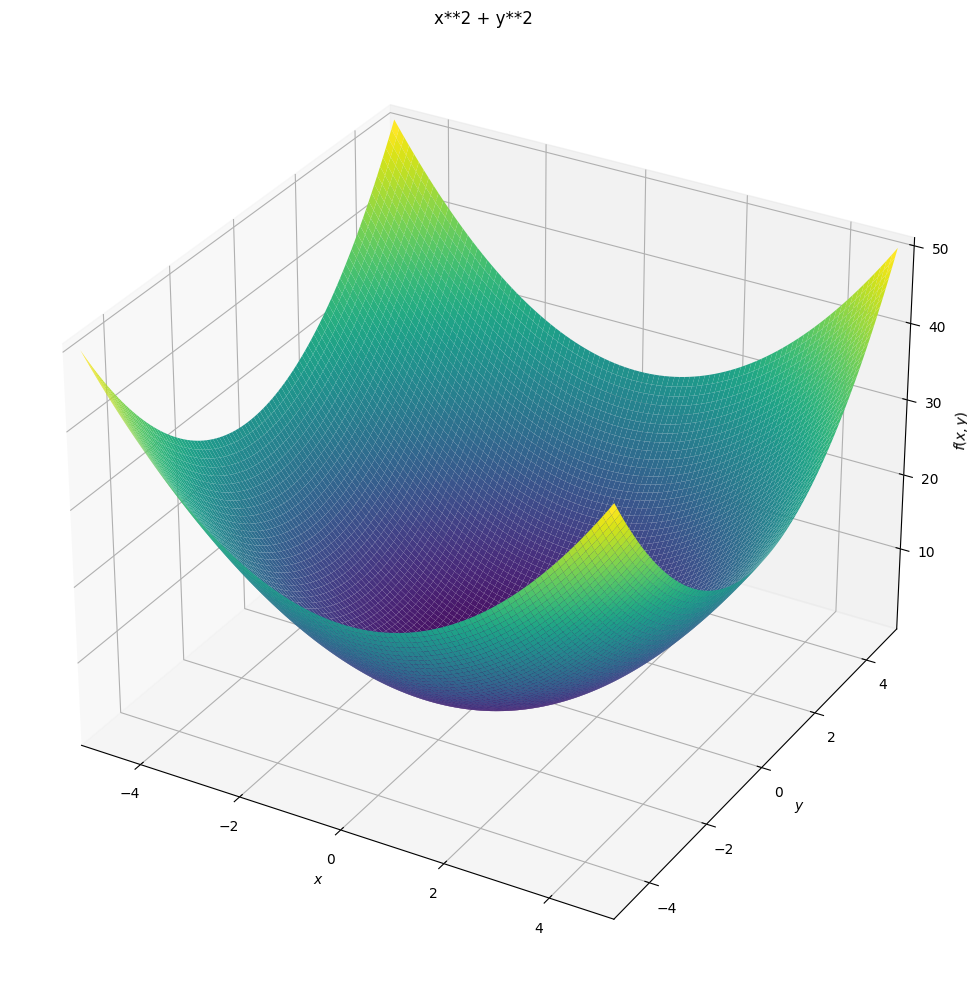

In [24]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

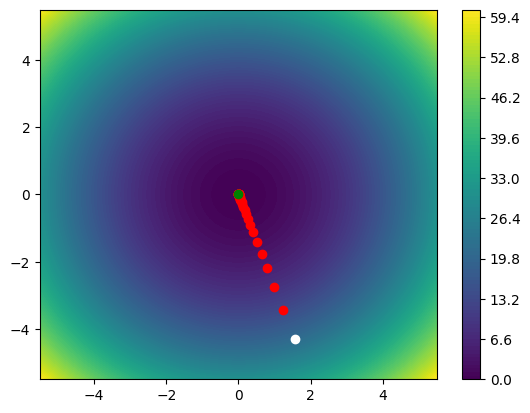

Solucion: [2.224965582009265e-05, -6.124311742100145e-05] 4.245766615555154e-09


In [25]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
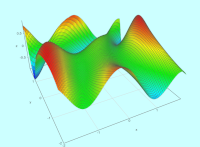


In [26]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


Procedemos a resolver

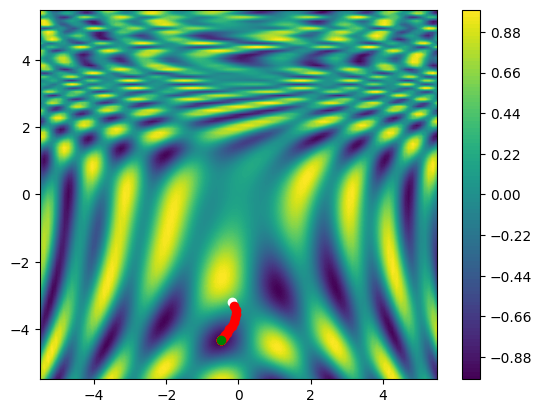

Solución: [-0.49343903 -4.33245809] Valor de la función: -0.9999999998523201


In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Definir la función
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2 * X[0] + 1 - math.exp(X[1]))

# Colocamos el gradiente numéricamente
def gradiente_aproximado(f, X, h=1e-5):
    dfx = (f([X[0] + h, X[1]]) - f([X[0], X[1]])) / h
    dfy = (f([X[0], X[1] + h]) - f([X[0], X[1]])) / h
    return np.array([dfx, dfy])

# Se prepara los datos para dibujar el mapa de niveles de Z
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Graficamos el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y lo colocamos en blanco
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje o LR
TA = 0.1

# Probamos con 50 iteraciones
for _ in range(50):
    grad = gradiente_aproximado(f, P)
    P = P - TA * grad
    plt.plot(P[0], P[1], "o", c="red")

# Graficamos el punto final y lo pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solución:", P, "Valor de la función:", f(P))

El descenso de gradiente hizo su trabajo y encontró un mínimo local de la función, lo cual era lo que esperábamos. La gráfica muestra el recorrido desde un punto inicial al azar hasta un punto donde el algoritmo se “estabiliza” y ya no puede bajar más. El valor obtenido es una buena aproximación a un mínimo, aunque, claro, con funciones complejas como esta, siempre puede haber otros mínimos locales dependiendo de por dónde empieces. En resumen, el descenso de gradiente nos llevó a una buena solución, ¡misión cumplida!